# Importing Dataset

In [1]:
import pandas as pd
#Loading the dataset collected.  
#This dataset contains class labels: positive, negative, neutral
data = pd.read_csv("D:\\MASTERAL\BINARYmYDATASET.CSV",encoding='UTF-8')

<h4>Dataset Basic Stats</h4>

In [2]:
#data.shape
print(len(data.REVIEWS))
data['POLARITY'].value_counts()

46753


POSITIVE    23379
NEGATIVE    23374
Name: POLARITY, dtype: int64

In [3]:
#This code is for exploration purpose: we want to see the Words and their respective counts
#the code is somehow similar to the bag of words representations
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 
counts = vectorizer.fit_transform(data.REVIEWS)
#unigrams=pd.DataFrame(counts.sum(axis=0),columns=counts.get_feature_names()).T.sort_values(0,ascending=False).head(30)
#unigrams
#words = vectorizer.vocabulary_
#words = vectorizer.get_feature_names()
#t.columns=['count']


<h2>Data Preprocessing/Cleaning</h2>

In [4]:
#data=data.isnull().sum() # To determine whether there are any missing values in our dataframe
#data=data.dropna() # drop empty rows, impute null values
#data.dtype
#converting POLARITY column into numeric target 
#1. ==========
#data.loc[data['POLARITY']=='POSITIVE','POLARITY']=1
#data.loc[data['POLARITY']=='NEGATIVE','POLARITY']=0
#data.head()

#2. ======================================
data['POLARITY']=data.POLARITY.map({'POSITIVE':1,'NEGATIVE':0})
data.head(10)

,REVIEWS,POLARITY
0,Way komo sa pag ampo. Ang pag-ampo maoy lig on...,1
1,TUNOK sa ugmarong kalamboan mao'y silbing gumo...,1
2,SULOD sa pito ka tuig mipundo (steady) ang ato...,1
3,WAY kauwaw ang pagtabi og dala nga hambog ni K...,0
4,Way klarong hinungdan ug pagpasabot.,0
5,Gipaabot nga ang Annual Audit Report (AAR) sa ...,0
6,Kun aduna nay Certificate of Finality kinahang...,1
7,Kun ako inyong Magtutudlo ug Ginoo nihugas sa ...,1
8,Kun ako maoy Osmena pahingusgan nako ang pagp...,1
9,Kun ako pay Mayor Osmena mas padayonon nakong ...,1


In [5]:
import string
def convert_tolowercase(text):
  # Convert all characters to lowercase from list of tokenized words"""   
    new_word = (map(lambda x: x.lower(), text))
    new_words = list(new_word)
    return new_words  #new_words

#  new_words = []   
   # for word in text:                #a = [x.lower() for x in s]
    #    new_word = word.lower()
     #   new_words.append(new_word)
 
   # for word in range(len(text)):
   #    text[word] = text[word].lower()
   # return text

In [6]:
# The function above takes a pandas series object as input and applies lambda functions which remove numbers
import re
def remove_digits(text):
    new_words = []
    for word in text:
        new_word=re.sub(r'\d+','', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [7]:
import string
import unicodedata
def remove_non_ascii(words):
#"""Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD',word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [8]:
def remove_punctuations(words):
#Remove punctuations make sure all are removed
    new_words = []
    for word in words:    
        
        #new_word = re.sub(r"[-()\"#/@;:<>{}=~|.?,&$]!", "", word)
        new_word = re.sub('[^a-zA-Z]','',word)
        new_word = re.sub('[%s]'%re.escape(string.punctuation),'',word)
       # if new_word != '':
        new_words.append(new_word)
    return new_words


#data_1=[char for char in data if char not in string.punctuation]
#data_1=''.join(data_1)
#print (data_1)

In [9]:
def remove_singleCharString(words):
    new_words = []  
    for word in words:
        new_word=re.sub(r"(^| ).(( ).)*( |$)",' ',word) 
        if new_word !='':
            new_words.append(new_word)
    return new_words

In [10]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
#nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(text):
    stpwrd = nltk.corpus.stopwords.words('english')
    s_new = []
    new_stopwords = ["ang", "ug", "og", 'na','ni',"nga",
                 'iyang','ila','imo',
                 'ka','kay','kini','kining','ko','kon','kung',
                 "mga",
                 'niini',
                 'pa',
                 'ra',
                 'sa','sab','sila','siya',
                'usab']
    
   
    stpwrd.extend(new_stopwords)
    for sent in text:
        s=sent.split()
        string=''
        token_result=[]
        for word in s:#word_tokenize(sent):       
            if not word in stpwrd:
                string +=' ' + word
                string1=''.join(string)
                #token_result.append(w)
        s_new.append(string1)    
    return s_new       

In [11]:
contractions={ 
   "adunay":"aduna may",
   "agi'g":"agi ug", "agi'g":"agi ug",
    "angay'ng":"angay nga",
    "asa'y":"asa may",
    "ato'ng":"ato nga",
    "atoang":"atoa nga",
    "aduna'y":"aduna may","adunaha'ng":"adunahan nga",
    "ako'y":"ako may","apektado'ng":"apektado nga","adlaw'ng":"adlaw nga",
    "bahala'g":"bahala ug","ba'y":"ba diay","bali'g":"bali ug",
    "bisa'g":"bisan ug",
    "diay'g":"diay ug","dako'ng":"dako nga","duna'y":"duna may","dayo'g":"dayon ug",
    "dako'ng":"dako nga",
    "du't":"duot",
    "gagmay'ng":"gagmay nga","ginagmay'ng":"ginagmay nga",
    "gamay'ng":"gamay nga","gamayng":"gamay nga",
    "gyu'y":"gyud may","gayu'y":"gyud may","gyuy":"gayud may","g'yuy":"gyud may",
    "g'yud":"gayud", # 
    "iro'ng":"iro nga","kanato'ng":"kanato nga","inadlaw'ng":"inadlaw nga",
    "gihimong":"gihimo nga", "nahimong":"nahimo nga","nakahimong":"nakahimo nga",
    "iyang":"iya nga",
    "kini'g":"kini ug",
    "kita'g":"kita ug",
    "la'g":"lang ug","langyaw'ng":"langyaw nga","hinuo'y":"hinuon may","mo'g":"mo ug",
    "maghimo'g":"maghimo ug",  
    "mangita'g":"mangita ug",
    "mura'g":"mura ug","magkunsumo'g":"magkunsumo ug","makapaagni'g":"makapaagni ug",
    "mangita'g":"mangita ug",
    "mipasaka'g":"mipasaka ug",
    "pagpangita'g":"pagpangita ug",
    "mi'g":"kami ug","mo'y":"mo may","mao'y":"mao may","magmaneho'g":"magmaneho ug",
    "magsigeg":"magsige ug",
    "milabay'ng":"milabay'ng","maayo'ng":"maayo nga","inantigo'ng":"inantigo nga",
    "nahibu'ng":"nahibulong",
    "nahuptan'g":"nahuptan nga",
    "madutla'g":"madutlan ug",
    "mura'g":"mura ug",
    "nakalabay'ng":"nakalabay nga",
    "nila'g":"nila ug",
    "naghimo'g":"naghimo ug","nahimong":"nahimo nga","naninda'g":"naninda ug",
    "nganong":"ngano nga","nagbato'g":"nagbaton ug","kahimoa'g":"kahimoan ug",
    "kagagmayg":"kagagmay ug",
    "ko'y":"ko may",
    "ko'g":"ko ug",
    "kagahig":"kagahi ug","kanato'ng":"kanato ang",
    "kinig":"kini ug",
    "kita'g":"kita ug","kaayo'y":"kaayo may","kaugalingo'ng":"kaugalingon nga","kaha'y":"kaha may","kanunay'ng":"kanunay nga",
    "na'y":"naa may","nagbato'g":"nagbanton ug","nga'n":"ngalan",
    "nangita'g":"nangita ug",
    "naa'y":"naa may","ni'ng":"niini nga","niini'ng":"niini nga","na'g":"na ug","naasoy'ng":"naasoy nga",
    "nagpatugatuga'g":"nagpatugatuga ug","na'g":"na ug",
    "ni'g":"kini ug","negatibo'g":"negatibo ug","gagmay'ng":"gagmay nga",
    "ordinaryo'ng":"ordinaryo nga",
    "panumba'y":"panung sa balay",
    "pu'y":"pud diay","paghimo'g":"paghimo ug","pagmaneho'g":"pagmaneho ug","pila'y":"pila may",
    "pa'y":"pa may","patay'ng":"patay nga","pa'ng":"pa nga","piniliay'ng":"piniliay nga",
    "paghimo'g":"paghimo ug","pagkao'g":"pagkaon ug",
    "pordoy'ng":"pordoy nga","pagsige'g":"pagsige ug","pagpamaligya'g":"pagpamaligya ug",
    "ra'y":"ra may","ra'g":"ra ug","sila'g":"sila ug",
    "selyula'ng":"selyula nga","sa'y":"sab may",
    "sila'y":"sila may","siya'y":"siya may",
    "tawhano'ng":"tawhanon nga","tawhanong":"tawhanon nga",
    "ta'y":"ta may","ta's":"ta sa",
    "uban'g":"uban nga","usa'y":"usa may","unya'g":"unyag ug",
    "unsa'y":"unsa may","unta'g":"unta ug","usa'g-usa":"usa ug usa",
    "wala'y":"wala may", "wa'y":"wala may",    
    # the danger of the shortened words is there presence as a substring in the textual unit when replaced: 
    #"wa":"wala",
    #"way":"wala may" "mi'g":"mi ug","mi":"kami", "kog":"ko ug", ,"koy":"ko may","kitag":"kita ug"
    #"ko":"ako","murag":"mura ug", "pay":"pa may","naay":"naa may","nig":"ni ug","ni":"kini","sab":"usab",.
}

def expand_to_contraction(words):
    new_words=[]
    for word in words:
        if type(word) is str: 
    #To do: The word must be a distinct string NOT as substring to avoid repetition Ex. wa = wala <> kawawa should be kawawa not kawalawala
      #pattern = re.compile(r'\b[\w]\b')
          for key in contractions:
            value =contractions[key]
            word = word.replace(key,value)
        new_words.append(word)
            
    return new_words


In [12]:
data['REVIEWS']=convert_tolowercase(data['REVIEWS'])
data['REVIEWS']= expand_to_contraction(data['REVIEWS'])
data['REVIEWS']=remove_stopwords(data['REVIEWS'])     
data['REVIEWS']=remove_digits(data['REVIEWS'].squeeze())
data['REVIEWS']=remove_punctuations(data['REVIEWS'].squeeze())
data['REVIEWS']=remove_non_ascii(data['REVIEWS'].squeeze())
data['REVIEWS']=remove_singleCharString(data['REVIEWS'].squeeze())

In [13]:
data

,REVIEWS,POLARITY
0,way komo pag ampo pagampo maoy lig hinagiban ...,1
1,tunok ugmarong kalamboan mao may silbing gumo...,1
2,sulod pito tuig mipundo steady atong peso kon...,1
3,way kauwaw pagtabi dala hambog kongresista pa...,0
4,way klarong hinungdan pagpasabot,0
...,...,...
46748,gikataho si po inihao nagpatabang kang po nun...,1
46749,mopabalanse lebel kolesterol mopausos inormal...,1
46750,yun naman talaga gusto nyoikulong nyo ako ngayon,0
46751,ngano man daghan man wala makadungog duna man...,1


In [17]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
#nltk.download('stopwords')
from nltk.corpus import stopwords
#def remove_stopwords(text):
sentences = ["gihapon is could still",
             "honestly daghan if you",
             'sa akong nakita ']

new_sent=list()
#stop=stopwords.words('english')
new_stopwords = ["could", 'is',"due", "to", "on", "daily",'sa','a']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

for sen in sentences:  
    s=sen.split()
    #token_result=[]
    string=''
    string1=''
    for word in s:         
        if not word in stpwrd:
            string +=' ' + word
            string1=''.join(string)
            #print(string1)
            #token_result.append(string1)
            #print(token_result)
    new_sent.append(string1)            

<h3>Dividing Dataset into Training and Test set</h3>

In [14]:
from sklearn.model_selection import train_test_split
#Splitting dataset into 80% training set and 20% test set

X_train, X_test, y_train, y_test= train_test_split(data.REVIEWS, data.POLARITY,test_size =0.2, random_state=0)

<h3>Data Transformation</h3>

In [15]:
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopset=set(stopwords.words('english'))
vectorizer =TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)


In [16]:
#converting training features into numeric vector
train_vectors= vectorizer.fit_transform(X_train) # converting training features into numeric vector; this code allows our vectorizer to learn the vocabulary
test_vectors = vectorizer.transform(X_test)      # converting training labels into numeric vector

In [17]:
#words are stored in the vectorizer object and the dictionary/lexicons/vocabulary can be seen in two ways
#1. with the corresponding word index
#words = vectorizer.vocabulary_

#2. can be retrieved using get_feature_name () method
words =vectorizer.get_feature_names() 
#words[1:500] #accessing specific words in range
words

['aar',
 'aawit',
 'ab',
 'abacahan',
 'abad',
 'abadinas',
 'abag',
 'abaga',
 'abagahon',
 'abagan',
 'abais',
 'aballe',
 'abalo',
 'abalos',
 'abandoned',
 'abanes',
 'abang',
 'abangan',
 'abante',
 'abanteatras',
 'abaton',
 'abaya',
 'abbey',
 'abbra',
 'abbreviation',
 'abbu',
 'abc',
 'abdhir',
 'abe',
 'abecina',
 'abel',
 'abelardo',
 'abelgas',
 'abella',
 'abellana',
 'abellanosa',
 'abellera',
 'abendan',
 'aber',
 'abesamis',
 'abf',
 'abi',
 'abiabiha',
 'abiabihon',
 'abiba',
 'abilidad',
 'abilidaran',
 'abilities',
 'abin',
 'able',
 'abli',
 'ablihan',
 'ablihon',
 'abling',
 'ablir',
 'abnormal',
 'abo',
 'aboard',
 'abog',
 'abogada',
 'abogado',
 'abogadong',
 'abogasiya',
 'abogasya',
 'aboitiz',
 'abolison',
 'aborsiyon',
 'abortion',
 'abot',
 'abotanan',
 'aboveground',
 'abracadabra',
 'abraham',
 'abrams',
 'abri',
 'abrihan',
 'abril',
 'abroad',
 'abrod',
 'abs',
 'abscbn',
 'abscorbate',
 'abscorbic',
 'absence',
 'absent',
 'absentee',
 'absinero',
 'ab

In [18]:
#type(train_vectors)
#%matplotlib inline
#import matplotlib.pyplot as plt
#plt.figure(figsize=(20,4))
#s = plt.imshow(train_vectors)
train_vectors[:,200]

<37402x1 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [19]:
#type(train_vectors)
#train_vectors.toarray()

In [20]:
#Saving augmented BOW to later use in prediction
import pickle
path='D:/masteral/tfidfSentimentModel.pkl'
pickle.dump(vectorizer,open(path,"wb"))

In [21]:
#Explore the shape of the feature vectors used for training and testing
print(f'{train_vectors.shape} training set ')
print(f'{test_vectors.shape} test set')

(37402, 45446) training set 
(9351, 45446) test set


from pandas import DataFrame #sklearn.feature_extraction.text import CountVectorizer

#co = CountVectorizer() #Bag of Words
#counts = co.fit_transform(X_train)
print(DataFrame(train_vectors.A,columns=vectorizer.get_feature_names()).to_string())
#t=pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

<h3>Model Fitting/(Naive Bayes)</h3>

In [22]:
#We will be traing our model. After the Training our SA is ready and trained
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_vectors,y_train) # supply the fit method with training data and labels to completely train the model

MultinomialNB()

In [23]:
#Export NB classifier to later use in prediction
import joblib
joblib.dump(mnb,'D:/masteral/BISAYASenti.Model')

['D:/masteral/BISAYASenti.Model']

<h3> Evaluate Model Performance </h3>

In [24]:
#let us test the performance of ourmodel on the test set to predict the sentiment labels.
from sklearn.metrics import confusion_matrix
y_pred = mnb.predict(test_vectors) # test data/vector is feed into the classifier's predict method
nr_correct = (y_test == y_pred).sum()  #nr_correct = (y_test == mnb.predict(test_vectors)).sum()
print(f'{nr_correct} documents classified correctly')
nr_incorrect = y_test.size-nr_correct
print(f'{nr_incorrect} documents classified incorrectly')
fraction_wrong = nr_incorrect/(nr_correct + nr_incorrect)
print(f'Testing accuracy of the model is {1-fraction_wrong}')
print(f'Accuracy of model {mnb.score(test_vectors,y_test)}')
print(confusion_matrix(y_test,y_pred))

6619 documents classified correctly
2732 documents classified incorrectly
Testing accuracy of the model is 0.7078387338252593
Accuracy of model 0.7078387338252593
[[3554 1072]
 [1660 3065]]


In [28]:
from sklearn.metrics import recall_score,precision_score,f1_score
print(recall_score(y_test,mnb.predict(test_vectors)))
print(precision_score(y_test,mnb.predict(test_vectors)))
print(f1_score(y_test,mnb.predict(test_vectors)))

0.6486772486772486
0.7408750302151318
0.6917174452719476


In [26]:
#Printing accuracy of the our model
from sklearn import metrics
from sklearn.metrics import accuracy_score 

predicted_train = mnb.predict(train_vectors)
print('Training Accuracy' ,accuracy_score(y_train,predicted_train))
print(metrics.classification_report(y_train,predicted_train))
metrics.confusion_matrix(y_train,predicted_train)

predicted_test = mnb.predict(test_vectors)
print('Testing Accuracy' ,accuracy_score(y_test,predicted_test))
print(metrics.classification_report(y_test,predicted_test)) # labels=y_test.cat.categories.tolist()


Training Accuracy 0.831960857708144
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     18748
           1       0.87      0.78      0.82     18654

    accuracy                           0.83     37402
   macro avg       0.83      0.83      0.83     37402
weighted avg       0.83      0.83      0.83     37402

Testing Accuracy 0.7078387338252593
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      4626
           1       0.74      0.65      0.69      4725

    accuracy                           0.71      9351
   macro avg       0.71      0.71      0.71      9351
weighted avg       0.71      0.71      0.71      9351



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

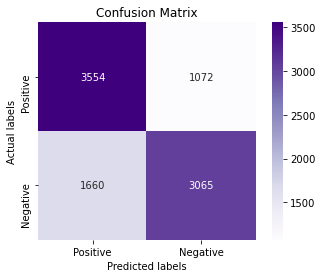

In [34]:
#Printing the confusion matrix of our prediction
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

ax=plt.subplot()
predict_results = mnb.predict(test_vectors)
predict_results = (predict_results > 0.5) #.astype(int)

cm= confusion_matrix(y_test,predict_results)

sns.heatmap(cm, square=True, annot=True,fmt='d', cbar=True, ax= ax, cmap=plt.cm.Purples);

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Positive','Negative']);ax.yaxis.set_ticklabels(['Positive','Negative'])


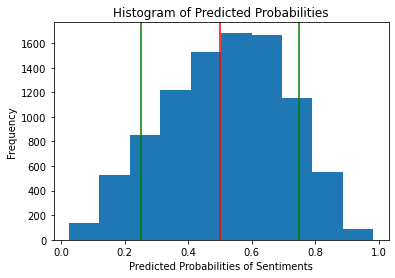

In [247]:
#store the predicted probabilities of class membership
y_pred_prob = mnb.predict_proba(test_vectors)[:,0] #estimated probabilities or confidence score of each word
plt.hist(y_pred_prob)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probabilities of Sentiments')
plt.ylabel('Frequency')
_=plt.axvline(x=0.5,color ='red')
_=plt.axvline(x=0.75,color ='green')
_=plt.axvline(x=0.25,color ='green')
#print(test_vectors)# the vector of each word
#test_vectors.shape
#y_predict=[int (p[1]>0.5) for p in mnb.predict_proba(test_vectors)]
#y_predict[-10:]
#y_test[-10:]

In [252]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange', label='ROC')
    plt.plot([0,1],color='darkblue', linestyle='dashed')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show

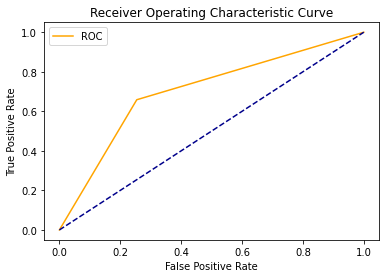

In [253]:
plot_roc_curve(fpr,tpr)

In [254]:
# classifier performance
from sklearn.metrics import roc_auc_score,roc_curve
pc_auc=roc_auc_score(y_test,y_pred) *100
pc_auc

70.58291548348325

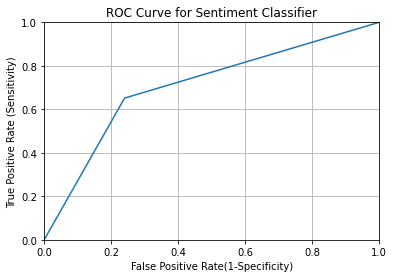

In [255]:
from sklearn import metrics
fpr,tpr, thresholds= metrics.roc_curve(y_test,predicted_test)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for Sentiment Classifier')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [256]:
def evaluate_threshold(threshold):
    print ('Sensitivity', tpr[thresholds > threshold][-1])
    print ('Specificity', 1 - fpr[thresholds > threshold][-1])
    


In [257]:
evaluate_threshold(0.2)
#evaluate_threshold(0.5)

Sensitivity 0.6516497461928934
Specificity 0.7600085634767716


<h2>====================  End Model Building   =====================</h2>